In [1]:
import numpy as np
from IPython.display import Image
import itertools

In [2]:
import seaborn as sns

In [3]:
def get_houses():

    houses = np.zeros((10,10))
    houses[0,2] = 1
    houses[0,4] = 1
    houses[0,5] = 1
    houses[0,7] = 1

    houses[1,0] = 1
    houses[1,4] = 1

    houses[2,3] = 1
    houses[2,5] = 1
    houses[2,6] = 1
    houses[2,8] = 1
    houses[2,9] = 1

    houses[3,4] = 1
    houses[3,6] = 1
    houses[3,8] = 1

    houses[4,2] = 1
    houses[4,5] = 1
    houses[4,6] = 1
    houses[4,7] = 1
    houses[4,8] = 1

    houses[5,0] = 1
    houses[5,3] = 1
    houses[5,4] = 1
    houses[5,6] = 1

    houses[6,0] = 1
    houses[6,1] = 1
    houses[6,2] = 1
    houses[6,3] = 1
    houses[6,4] = 1
    houses[6,9] = 1

    houses[7,4] = 1
    houses[7,6] = 1

    houses[8,0] = 1
    houses[8,2] = 1
    houses[8,6] = 1
    houses[8,7] = 1
    houses[8,9] = 1

    houses[9,0] = 1
    houses[9,4] = 1
    houses[9,5] = 1
    houses[9,8] = 1
    houses[9,9] = 1

    return houses.astype(np.float16)

In [4]:
houses = get_houses()

In [5]:
def get_center(possible_coordinates):
    if len(possible_coordinates) == 3:
        center = possible_coordinates[1]
    
    else:
        if possible_coordinates[1] == 9:
            center = 9
        elif possible_coordinates[0] == 0:
            center = 0
    return center

In [6]:
def get_weight(i_possiblities,j_possiblities,houses):
    
    center_x = get_center(i_possiblities)
    center_y = get_center(j_possiblities)
    
    all_coordinates = list(itertools.product(i_possiblities,j_possiblities))
    non_center_coordinates = [item for item in all_coordinates if item!=(center_x,center_y)]
    
    total = 0
    
    for coordinate in non_center_coordinates:
        if houses[coordinate[0],coordinate[1]] > 0:
            total = total + 0.5
    total = total + houses[center_x,center_y]

    return total
    
def get_weight_matrix(_houses):
    weight_matrix = np.zeros((10,10))
    for i in range(_houses.shape[0]):
        for j in range(_houses.shape[1]):
            if i>0 and i<9:
                i_possiblities = [i-1,i,i+1]
            elif i==0:
                i_possiblities = [i,i+1]
            else:
                i_possiblities = [i-1,i]
            if j>0 and j<9:
                j_possiblities = [j-1,j,j+1]

            elif j==0:
                j_possiblities = [j,j+1]
            else:
                j_possiblities = [j-1,j]
            weight_matrix[i,j] = get_weight(i_possiblities,j_possiblities,_houses)
    return weight_matrix

In [7]:
def add_tower(i,j,houses,towers):
    new_towers = towers.copy()
    new_houses = houses.copy()
    if i>0 and i<9:
            i_possiblities = [i-1,i,i+1]
    elif i==0:
            i_possiblities = [i,i+1]
    else:
            i_possiblities = [i-1,i]
    if j>0 and j<9:
            j_possiblities = [j-1,j,j+1]
    elif j==0:
            j_possiblities = [j,j+1]
    else:
            j_possiblities = [j-1,j]
            
    center_x = get_center(i_possiblities)
    center_y = get_center(j_possiblities)
    
    all_coordinates = list(itertools.product(i_possiblities,j_possiblities))
    non_center_coordinates = [item for item in all_coordinates if item!=(center_x,center_y)]
    
    for coordinate in non_center_coordinates:
        if new_houses[coordinate[0],coordinate[1]] == 1:
            new_houses[coordinate[0],coordinate[1]] = 0.5
        elif new_houses[coordinate[0],coordinate[1]] == 0.5:
            new_houses[coordinate[0],coordinate[1]] = 0
            
    new_houses[center_x,center_y] = 0
    
    new_towers[i,j] = 1
    return new_houses,new_towers

##### %70 Service Rate

In [8]:
houses = get_houses()
num_towers = 0
new_houses = houses.copy()
towers = np.zeros((10,10))
while ((new_houses).sum() > 12):
    weight_matrix = get_weight_matrix(new_houses)
    max_weight_idx = np.where(weight_matrix == (weight_matrix.max()))
    try:
        for i in range(len(max_weight_idx[0])):
            x_max = max_weight_idx[0][i]
            y_max = max_weight_idx[1][i]
            if(towers[x_max,y_max]) == 0:
                break
    except Exception as e:
        x_max = max_weight_idx[0][0]
        y_max = max_weight_idx[1][0]
        print(e)
    new_houses,towers = add_tower(x_max,y_max,new_houses,towers)
    num_towers +=1
print("Number of towers:",num_towers)


Number of towers: 11


In [9]:
print(towers)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [10]:
print(new_houses)

[[0.  0.  1.  0.  0.5 0.5 0.  1.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0. ]
 [0.5 0.  0.  0.  0.  0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0.5 0.5 0.  0.5]
 [1.  0.  0.  0.  0.5 0.5 0.  0.  0.  0.5]]


#### Full Map

<AxesSubplot:>

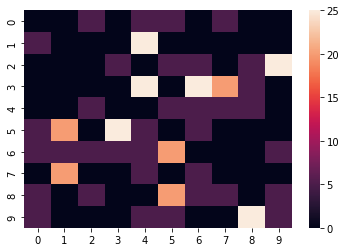

In [11]:
towers = towers*20
houses = get_houses()*5
sns.heatmap(towers+houses)

<AxesSubplot:>

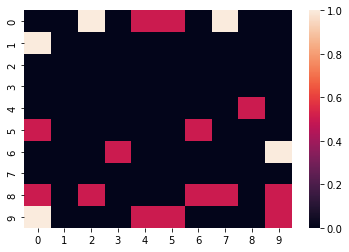

In [12]:
sns.heatmap(new_houses)

In [13]:
houses = get_houses()
num_towers = 0
new_houses = houses.copy()
towers = np.zeros((10,10))
while (new_houses.sum() > 4.1):
    weight_matrix = get_weight_matrix(new_houses)
    max_weight_idx = np.where(weight_matrix == (weight_matrix.max()))
    try:
        for i in range(len(max_weight_idx[0])):
            x_max = max_weight_idx[0][i]
            y_max = max_weight_idx[1][i]
            if(towers[x_max,y_max]) == 0:
                break
    except Exception as e:
        x_max = max_weight_idx[0][0]
        y_max = max_weight_idx[1][0]
        print(e)
        
    new_houses,towers = add_tower(x_max,y_max,new_houses,towers)
    num_towers +=1
print("Number of towers:",num_towers)

Number of towers: 18


#### Full Map

<AxesSubplot:>

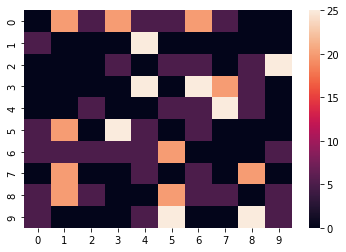

In [14]:
towers = towers*20
houses = get_houses()*5
sns.heatmap(towers+houses)

<AxesSubplot:>

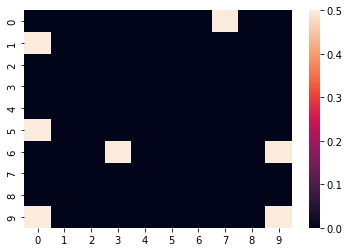

In [15]:
sns.heatmap(new_houses)